# Importing packages

In [1]:

from matplotlib import pyplot as plt
import numpy as np

# Reading the image

In [2]:
im = plt.imread(r"C:\Users\prasa\Desktop\ML\CNN_assignments\CNN_dataset_images\photo-1485288734756-0b31a0a31d95.jfif")

# Converting into R, G and B images

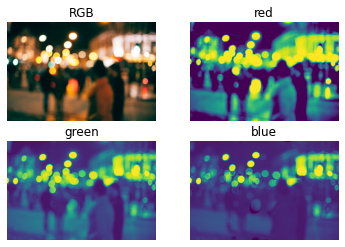

In [3]:

im_blue=im[:,:,2]
im_green=im[:,:,1]
im_red=im[:,:,0]
fig,ax=plt.subplots(2,2)

ax[0,0].imshow(im)
ax[0,0].axis('off')
ax[0,0].set_title('RGB')
ax[0,1].imshow(im_red)
ax[0,1].axis('off')
ax[0,1].set_title('red')
ax[1,0].imshow(im_green)
ax[1,0].axis('off')
ax[1,0].set_title('green')
ax[1,1].imshow(im_blue)
ax[1,1].axis('off')
ax[1,1].set_title('blue')
plt.show()


In [4]:
display(im_red)
display(type(im_red))
im_red[0,0]

array([[67, 73, 82, ...,  0,  0,  0],
       [66, 71, 80, ...,  0,  0,  0],
       [61, 68, 76, ...,  0,  0,  0],
       ...,
       [ 2,  2,  2, ...,  0,  0,  0],
       [ 3,  2,  2, ...,  0,  0,  0],
       [ 3,  3,  3, ...,  0,  0,  0]], dtype=uint8)

numpy.ndarray

67

# Function for zero padding

In [5]:
import numpy as np
def zero_padding(array):
    array1=np.zeros((array.shape[0]+2,array.shape[1]+2),dtype=int)
    for i in range(array.shape[0]):
         for j in range(array.shape[1]):
                array1[i+1,j+1]=array[i,j]
    display(array1)
    return array1
   
        
    

    



# Padding R G and B matices

In [6]:
im_red_pad=zero_padding(im_red)
im_green_pad=zero_padding(im_green)
im_blue_pad=zero_padding(im_blue)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 67, 73, ...,  0,  0,  0],
       [ 0, 66, 71, ...,  0,  0,  0],
       ...,
       [ 0,  3,  2, ...,  0,  0,  0],
       [ 0,  3,  3, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 54, 56, ..., 15, 15,  0],
       [ 0, 53, 56, ..., 15, 15,  0],
       ...,
       [ 0, 40, 39, ..., 31, 31,  0],
       [ 0, 40, 40, ..., 31, 31,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 35, 36, ..., 18, 18,  0],
       [ 0, 36, 37, ..., 18, 18,  0],
       ...,
       [ 0, 32, 31, ..., 26, 26,  0],
       [ 0, 32, 32, ..., 26, 26,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

### convolution fuctions that takes kernel as an argument

In [7]:
# Kernel to be applied on the matrices
kernel=np.array([[1,0,-1],[0,0,0],[-1,0,1]])
def convolution(array,kernel):
    arrayk=np.zeros((array.shape[0]-2,array.shape[1]-2),dtype=int)
    for i in range(array.shape[0]-2):
        for j in range(array.shape[1]-2):
            sums=0
            for k in range(0,kernel.shape[0]):
                for l in range(0,kernel.shape[1]):
                    
                    sums+=(array[i+k][j+l])*(kernel[k][l])
            arrayk[i][j]=sums
    return arrayk
            
                    
                    
            

In [8]:
k=(1/3)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)

### Displaying matrices of convoluted image

In [9]:
display(arrayh)
display(arrayi)
display(arrayj)

array([[213.,  42.,  51., ...,   0.,   0.,   0.],
       [-15.,   0.,   3., ...,   0.,   0.,   0.],
       [-21.,   0.,   3., ...,   0.,   0.,   0.],
       ...,
       [  3.,  -3.,   0., ...,   6.,   3.,   0.],
       [  3.,   0.,   0., ...,   0.,   0.,   0.],
       [ -6.,   3.,   0., ...,   0.,   0.,   0.]])

array([[ 168.,   18.,   18., ...,    0.,    0.,  -45.],
       [  -3.,    3.,    0., ...,    0.,    0.,    0.],
       [  -3.,    3.,    0., ...,    0.,    0.,    0.],
       ...,
       [   3.,   -3.,    0., ...,    3.,    3.,    3.],
       [   3.,    0.,    0., ...,    0.,    0.,    0.],
       [-117.,    3.,    0., ...,    6.,    3.,   93.]])

array([[111.,   6.,   6., ...,   0.,   0., -54.],
       [  6.,   6.,  -3., ...,   0.,   0.,   0.],
       [  3.,   6.,   0., ...,   0.,   0.,   0.],
       ...,
       [  3.,  -3.,   0., ...,   3.,   3.,   3.],
       [  3.,   0.,   0., ...,   0.,   0.,   0.],
       [-93.,   3.,   0., ...,   0.,   3.,  78.]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


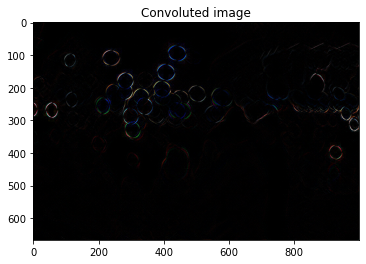

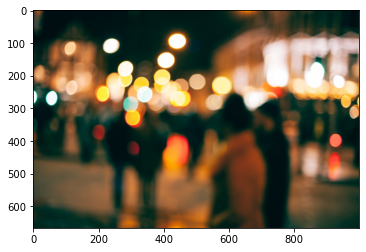

In [10]:
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)



  

### Mean square error function

In [11]:
def error_calculation(array1,array2):
    MSE=0
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            MSE+=((array1[i][j]-array2[i][j])**2)
    print('Mean square error for the two arrays is',MSE)
    return MSE
            

In [12]:
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
import pandas as pd
data={'Filter':['Boxblur','Sharpening','Edgedetection','gaussian_blur','Edgedetection2','Sobel']}
df1=pd.DataFrame(data,columns=['Filter','red','green','blue'])
df1.set_index('Filter',inplace=True)
df1.at['Boxblur','red']=1
#display(df1)

Mean square error for the two arrays is 11853472162.0
Mean square error for the two arrays is 7587756492.0
Mean square error for the two arrays is 4686631120.0


#### Applying Different Kernels for the imported image

##### Smoothing/Blurring using convloution(box Blur)


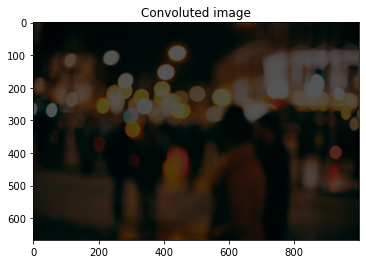

Mean square error for the two arrays is 5179041331.508336
Mean square error for the two arrays is 3296660755.4322214
Mean square error for the two arrays is 1988856357.6350315


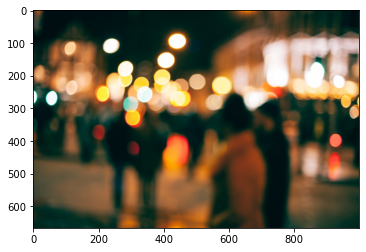

In [13]:
kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
k=(27)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
df1.at['Boxblur','red']=Mean_square_error_red
df1.at['Boxblur','green']=Mean_square_error_green
df1.at['Boxblur','blue']=Mean_square_error_blue

#### Sharpening

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


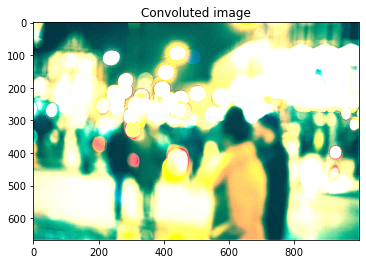

Mean square error for the two arrays is 107149120386.0
Mean square error for the two arrays is 68281966268.0
Mean square error for the two arrays is 41799974991.0


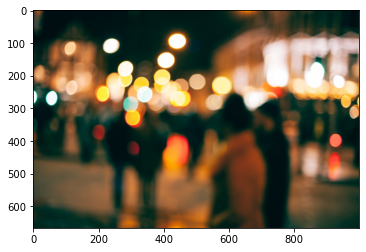

In [14]:
kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
k=(1/4)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
df1.at['Sharpening','red']=Mean_square_error_red
df1.at['Sharpening','green']=Mean_square_error_green
df1.at['Sharpening','blue']=Mean_square_error_blue

#### EdgeDetection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


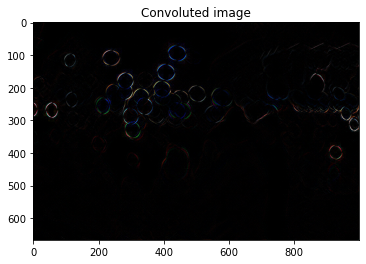

Mean square error for the two arrays is 11853472162.0
Mean square error for the two arrays is 7587756492.0
Mean square error for the two arrays is 4686631120.0


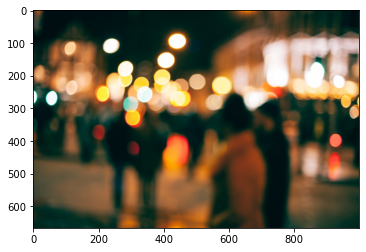

In [15]:
kernel=np.array([[1,0,-1],[0,0,0],[-1,0,1]])
k=(1/3)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
df1.at['Edgedetection','red']=Mean_square_error_red
df1.at['Edgedetection','green']=Mean_square_error_green
df1.at['Edgedetection','blue']=Mean_square_error_blue

#### Gaussian Blur

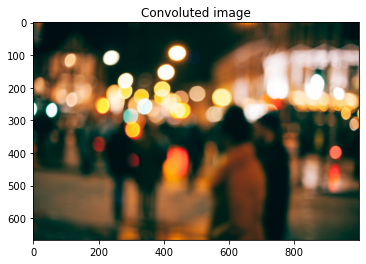

Mean square error for the two arrays is 3153970.328125
Mean square error for the two arrays is 2186555.109375
Mean square error for the two arrays is 2242867.00390625


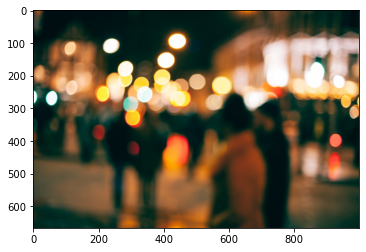

In [16]:
kernel=np.array([[1,2,1],[2,4,2],[1,2,1]])
k=(16)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
df1.at['gaussian_blur','red']=Mean_square_error_red
df1.at['gaussian_blur','green']=Mean_square_error_green
df1.at['gaussian_blur','blue']=Mean_square_error_blue

#### Edge detection2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


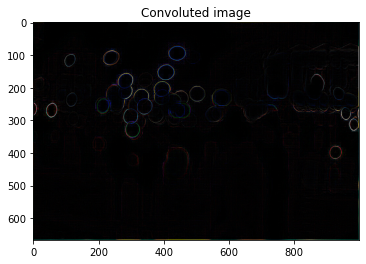

Mean square error for the two arrays is 11680126238.0
Mean square error for the two arrays is 7454742340.0
Mean square error for the two arrays is 4530576752.0


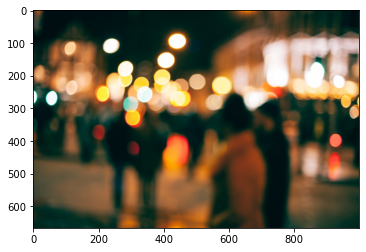

In [17]:
kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
k=(1)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
df1.at['Edgedetection2','red']=Mean_square_error_red
df1.at['Edgedetection2','green']=Mean_square_error_green
df1.at['Edgedetection2','blue']=Mean_square_error_blue

#### Sobel Operator Approximated kernel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


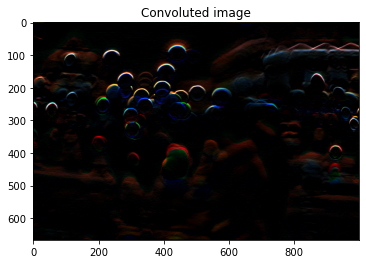

Mean square error for the two arrays is 12770608994.0
Mean square error for the two arrays is 8136844736.0
Mean square error for the two arrays is 5286992348.0


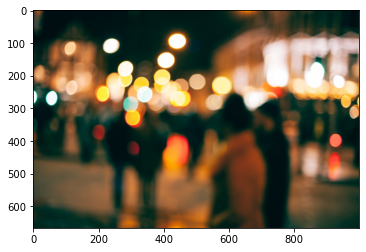

In [18]:
kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
k=(1)
arrayh=convolution(im_red_pad,kernel)
arrayh=(arrayh/k)
arrayi=convolution(im_green_pad,kernel)
arrayi=(arrayi/k)
arrayj=convolution(im_blue_pad,kernel)
arrayj=(arrayj/k)
final_image=np.stack((arrayh.astype(int),arrayi.astype(int),arrayj.astype(int)),axis=-1)
plt.imshow(final_image)
plt.title('Convoluted image')
plt.show()
plt.imshow(im)
Mean_square_error_red=error_calculation(arrayh,im_red)
Mean_square_error_green=error_calculation(arrayi,im_green)
Mean_square_error_blue=error_calculation(arrayj,im_blue)
df1.at['Sobel','red']=Mean_square_error_red
df1.at['Sobel','green']=Mean_square_error_green
df1.at['Sobel','blue']=Mean_square_error_blue

### MSE Errors for various filters

,red,green,blue
Filter,,,
Boxblur,5179041331.508336,3296660755.432221,1988856357.635031
Sharpening,107149120386.0,68281966268.0,41799974991.0
Edgedetection,11853472162.0,7587756492.0,4686631120.0
gaussian_blur,3153970.328125,2186555.109375,2242867.003906
Edgedetection2,11680126238.0,7454742340.0,4530576752.0
Sobel,12770608994.0,8136844736.0,5286992348.0


([<matplotlib.axis.XTick at 0x1497bba9190>,
 [Text(0.25, 0, 'Boxblur'),
  Text(1.25, 0, 'Sharpening'),
  Text(2.25, 0, 'Edgedetection'),
  Text(3.25, 0, 'gaussian_blur'),
  Text(4.25, 0, 'Edgedetection2'),
  Text(5.25, 0, 'Sobel')])

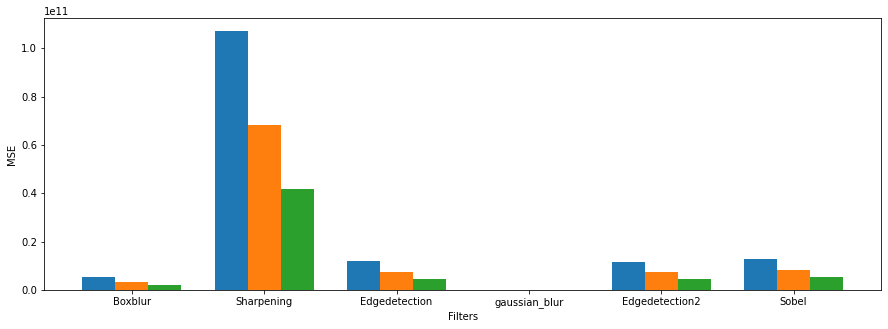

In [19]:

display(df1)
plt.figure(figsize=(15,5))
red=df1['red']
green=df1['green']
blue=df1['blue']
barWidth=0.25
br1 = np.arange(len(red))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1,red,label='red',width=0.25)
plt.bar(br2,green,label='green',width=0.25)
plt.bar(br3,blue,label='blue',width=0.25)
plt.xlabel('Filters')
plt.ylabel('MSE')
plt.xticks([r + barWidth for r in range(len(red))],
        df1.index)
